# Исследование рынка общественного питания в Москве

- Автор: Игнатьев Валерий
- Дата: 06.09.2025

### Цели и задачи проекта

**Цель:** Проведение исследовательского анализа рынка общественного питания в г.Москва. Инвесторы планируют открыть точку общественного питания в г.Москва. В данный момент они размышляют над типом, месторасположением, ценой и другими факторами. Для корректного принятия решения им необходим комплексный анализ.

**Задачи:**
1. Загрузка данных и знакомство с ними. Изучим датафреймы и посмотрим на тип данных в них.
2. Проведение предобработки данных. Проведем преобразование типов данных, изучим NaN значения и дубликаты.
3. Проведение исследовательского анализа данных:
    * Анализ категорий и мест расположения точек общественного питания в Москве. В каких районах города сосредоточено наибольшее количество точек общественного питания, и какие категории наиболее распространены в столице.
    * Исследование сетевых ресторанов: принадлежность к сетям и топ-категории. Анализ пятнадцати самых известных сетевых ресторанов. Определение типов заведений, наиболее часто встречающихся в сетевых структурах.
    * Оптимальное кол-во посадочных мест для каждой категории ресторанов
    * Анализ рейтингов и среднего чека ресторанов. Как рейтинг ресторана влияет на его другие показатели и как средний чек варьируется в различных районах Москвы.
4. Формулирование итогового вывода и рекомендаций

### Описание данных

**Файл `/datasets/rest_info.csv`** содержит информацию о заведениях общественного питания:
* **`name`** — название заведения;
* **`address`** — адрес заведения;
* **`district`** — административный район, в котором находится заведение <font color='#777778'>(например Центральный административный округ)</font>;
* **`category`** — категория заведения <font color='#777778'>(например «кафе», «пиццерия» или «кофейня»)</font>;
* **`hours`** — информация о днях и часах работы;
* **`rating`** — рейтинг заведения <font color='#777778'>(По оценкам пользователей в Яндекс Картах (высшая оценка — 5.0))</font>;
* **`chain`** — является ли заведение сетевым <font color='#777778'>(для маленьких сетей могут встречаться ошибки):
    * 0 — заведение не является сетевым;
    * 1 — заведение является сетевым.</font>
* **`seats`** — количество посадочных мест.


**Файл `/datasets/rest_price.csv`** содержит информацию о среднем чеке в заведениях общественного питания:
* **`price`** — категория цен в заведении <font color='#777778'>(например «средние», «ниже среднего», «выше среднего» и так далее)</font>;
* **`avg_bill`** — средняя стоимость заказа в виде диапазона в строке, <font color='#777778'>например:
    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    * «Цена бокала пива: 400–600 ₽».</font>
* **`middle_avg_bill`** — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:<font color='#777778'>
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.</font>
* **`middle_coffee_cup`** — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:<font color='#777778'>
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

* Загрузка данных и знакомство с ними.
* Предобработка данных.
* Исследовательский анализ данных.
* Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними

Загрузка необходимых библиотек и данных о заведениях общественного питания Москвы.

In [1]:
# Установка phik для работы с корреляцией
!pip install phik -q

In [2]:
# Устанавливаем библиотеку для работы с пропусками
!pip install missingno -q

In [3]:
# Импорт необходимых библиотек
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

In [4]:
# Загрузка необходимых датасетов
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Знакомство с данными

In [5]:
# Знакомство с rest_info_df
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Датафрейм `rest_info_df` содержит 9 колонок и 8 406 строк.

После первичного анализа можно сделать следующие выводы:
* Колонки `id`, `name`, `adress`, `hours` содержат строковые типы данных и к ним корректно применен тип `object`;
* Колонки `category`, `district` содержа строковые типы данных, для оптимизации ресурсов можно поменять тип данных на `category`;
* Колонка `rating` содержит корректный тип данных, для оптимизации ресурсов можем уменьшить разрядность;
* Колонка `seats` содержит тип данных `float64`, необходимо преобразовать в `integer` и уменьшить разрядность;
* Колонка `chain` содержит данные о наличии признака, эти данные можно оптимизировать и уменьшить разрядность.

Колонки `hours` и `seats` содержат пропуска. Необходимо проверить другие колонки на наличие значений-замен.

In [7]:
# Знакомство с rest_price_df
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [8]:
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Датафрейм `rest_price_df` содержит 5 колонок и 4 058 строк.

После первичного анализа можно сделать следующие выводы:
* Колонки `id`, `avg_bill` содержат строковые типы данных и к ним корректно применен тип `object`;
* Колонка `price` содержит строковые типы данных, для оптимизации ресурсов можно поменять тип данных на `category`;
* Колонки `middle_avg_bill`, `middle_coffee_cup` содержат корректный тип данных, для оптимизации ресурсов можем уменьшить разрядность;

Колонки `avg_bill`, `middle_avg_bill` и `seats` содержат пропуска. Необходимо проверить другие колонки на наличие значений-замен.

---

### Промежуточный вывод


* Все названия колонок удобны для работы и не нуждаются в изменении;
* Необходимо провести ряд преобразований для оптимизации ресурсов при вычислениях;
* Данные в колонках соответствуют названиям;
* Два датафрейма содержат пропуска;

### Подготовка единого датафрейма

Объединение двух датафремов. Т.к. нам необходимо изучать распределение ресторанов по рейтингу и местоположению из `rest_info_df`, то проведем левое соединение, которое позволит сохранить данные всех ресторанов.

In [9]:
# Проводим объединение в новый rest_df
rest_df = rest_info_df.merge(rest_price_df, on='id', how='left')

In [10]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [11]:
# Получим 3 рандомные строки из df
rest_df.sample(n=3)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
2877,8ecc3fe4e5714ec783d3bef80ca80e05,Bowl Family,быстрое питание,"Москва, Открытое шоссе, 4с1",Восточный административный округ,"ежедневно, 10:00–20:00",4.3,1,NaN,NaN,NaN,NaN,NaN
1394,689b35eb9dad426abd5491fc0cfefff5,VASILCHUKÍ Chaihona №1,ресторан,"Москва, Ленинградское шоссе, 16А",Северный административный округ,"пн-чт 10:00–00:00; пт,сб 10:00–01:00; вс 10:00...",4.4,1,NaN,выше среднего,Средний счёт:от 1500 ₽,1500.0,NaN
2474,06237d2ebf1c45aeb4531f723fd84c8b,Яндекс Лавка,ресторан,"Москва, Бакунинская улица, 74-76к1",Центральный административный округ,"ежедневно, 07:00–02:00",4.2,1,NaN,NaN,NaN,NaN,NaN


In [12]:
# Проверим разницу между исходным датафреймом и после джоина
len_rest_df = rest_info_df.shape[0]
len_new_df = rest_df.shape[0]

diff = (1- len_new_df/len_rest_df) *100 # Разница между исходными данными и новым DF

# Сравним уникальные id и проверим сколько данных мы потеряли при левом соединении
rest_uniq_id = set(rest_info_df['id'].unique())
price_uniq_id = set(rest_price_df['id'].unique())

rest_price_diff = len(rest_uniq_id - price_uniq_id) # Кол-во отсутствующих значений в price
price_rest_diff = len(price_uniq_id - rest_uniq_id) # Кол-во отсутствующих значений в rest


print(f'Разница между исходным датафреймом и новым {diff}% \n\nВ датафрейме rest_price_df отсутствуют {rest_price_diff} значений ID из rest_info_df \n\nВ датафрейме rest_info_df отсутствуют {price_rest_diff} значений ID из rest_price_df')

Разница между исходным датафреймом и новым 0.0% 

В датафрейме rest_price_df отсутствуют 4348 значений ID из rest_info_df 

В датафрейме rest_info_df отсутствуют 0 значений ID из rest_price_df


* При объединении датафреймов остались все исходные данные.
* В датафрейме `rest_info_df` представлены все значения `id`, которые есть в датафрейме `rest_price_df`
* В датафрейме `rest_price_df` отсутствуют 4348 значений id из общего датафрейма с ресторанами. Поскольку данные были взяты из открытых источников и некоторые параметры ресторанов могут не быть указаны на картах, поэтому отсутствие этих значений не является ошибкой выгрузки данных и соединения датафреймов, планирую обрабатывать их далее как NaN значения.

## 2. Предобработка данных

Подготовка данных к исследовательскому анализу:

#### Оптимизация типов данных

In [13]:
# Проведем преобразование в категории
for column_name in ['category', 'district', 'price']:
    rest_df[column_name] = rest_df[column_name].astype('category')

In [14]:
# Проведем преобразование и уменьшим разрядность для float колонок
for column_name in ['seats','rating', 'middle_avg_bill', 'middle_coffee_cup']:
    rest_df[column_name] = pd.to_numeric(rest_df[column_name], errors='coerce', downcast='float')

In [15]:
# Проведем преобразование и уменьшим разрядность для integer колонок
rest_df['chain'] = pd.to_numeric(rest_df['chain'], errors='coerce', downcast='integer')

In [16]:
# Проверим новые типы данных
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   category
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float32 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   float32 
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float32 
 12  middle_coffee_cup  535 non-null    float32 
dtypes: category(3), float32(4), int8(1), object(5)
memory usage: 559.1+ KB


___

#### Анализ пропущенных значений датафрейма

In [17]:
# Абсолютное кол-во пропусков
rest_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [18]:
# Относительное кол-во пропусков в %
pd.DataFrame(round(rest_df.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
id,0.000000
name,0.000000
category,0.000000
address,0.000000
district,0.000000
hours,6.380000
rating,0.000000
chain,0.000000
seats,42.960000
price,60.560000


<AxesSubplot:>

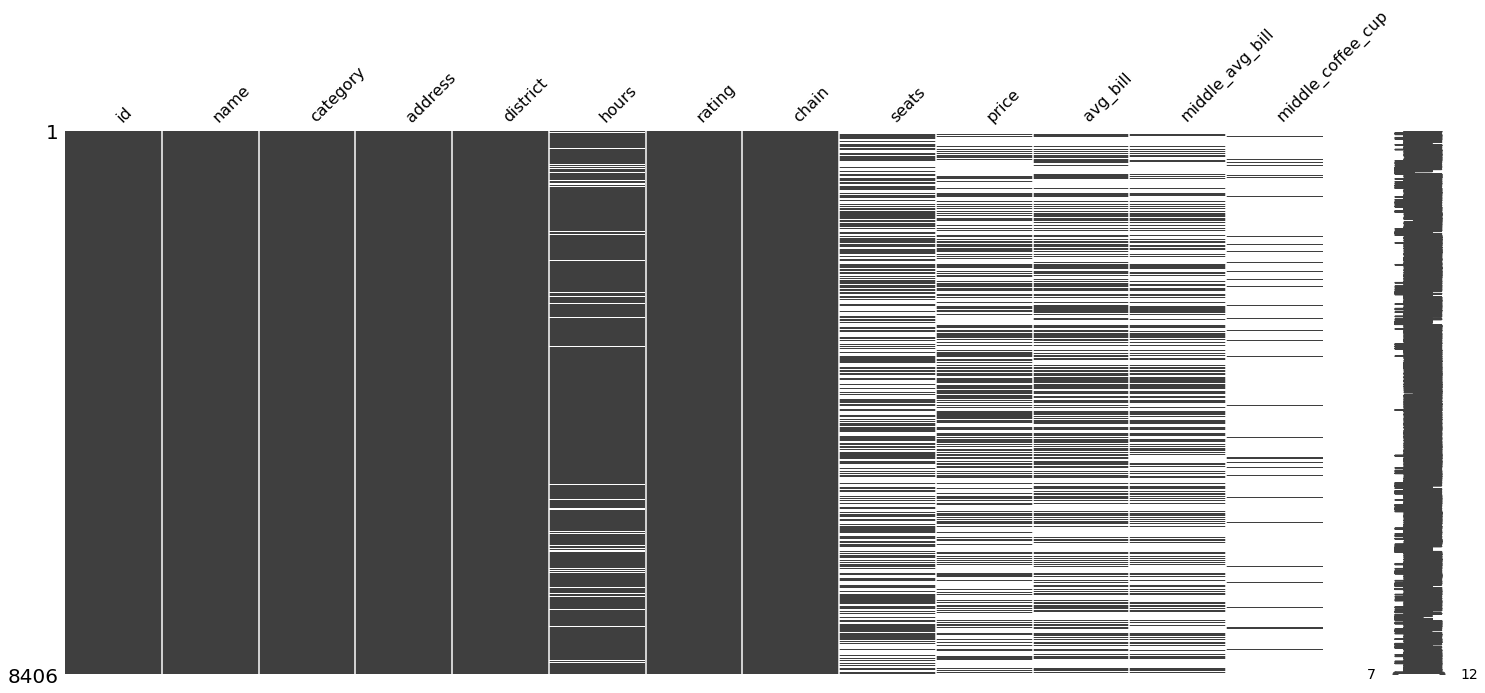

In [19]:
# Посмотрим матрицу пропусков
msno.matrix(rest_df)

In [20]:
# Изучим распределение пропусков в часах работы по типам мест
rest_df.groupby('category')['hours'].apply(lambda x: x.isna().mean() *100)

category
бар,паб             2.352941
булочная            2.734375
быстрое питание     5.472637
кафе               15.769554
кофейня             1.061571
пиццерия            0.789889
ресторан            3.622124
столовая            2.857143
Name: hours, dtype: float64

In [21]:
# Изучим распределение пропусков в кол-ве мест по типам мест
rest_df.groupby('category')['seats'].apply(lambda x: x.isna().mean() *100)

category
бар,паб            38.823529
булочная           42.187500
быстрое питание    42.122720
кафе               48.780488
кофейня            46.850672
пиццерия           32.543444
ресторан           37.836515
столовая           47.936508
Name: seats, dtype: float64

In [22]:
# Изучим распределение пропусков по рейтингу
rest_df['rating_group'] = pd.cut(rest_df['rating'], bins=(0.0,2.4,3.9, 5), labels=('Низкий рейтинг', 'Средний рейтинг', 'Высокий рейтинг'))
rest_df.groupby('rating_group')[['hours', 'seats']].apply(lambda x: x.isna().mean() *100)

,hours,seats
rating_group,,
Низкий рейтинг,17.346939,48.979592
Средний рейтинг,15.140415,49.572650
Высокий рейтинг,5.274402,42.155161


In [23]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   category
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float32 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   float32 
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float32 
 12  middle_coffee_cup  535 non-null    float32 
 13  rating_group       8406 non-null   category
dtypes: category(4), float32(4), int8(1), object(5)
memory usage: 567.5+ KB


**Пропуска в данных распределены следующим образом:**
* `hours` - 6.38%
* `seats` - 42.96%
* `price` - 60.56%
* `avg_bill` - 54.60%
* `middle_avg_bill` - 62.54%
* `middle_coffee_cup` - 93.64%

**Анализ пропусков:**
* Для колонок `price`, `avg_bill` пропуска являются нормой, т.к. эти данные собраны с карт, в которых могут быть не указаны цены и ценовой уровень для ресторана. Также для новых ресторанов с маленьким кол-вом отзывов цены могут также отсутствовать.<font color='#777778'> По информации на 2017 год, «Яндекс» получал сведения о ценах от самих организаций или собирал их на сайтах заведений.</font>
* Для колонок `middle_avg_bill`, `middle_coffee_cup` могут отсутствовать значения в связи с отсутсвием данных по категории и общих данных в колонке `avg_bill`.
* Для колонки `seats` могут отсутствовать значения по нескольким причинам. Данные заведения открыты только для самовывоза или в нет информации о кол-ве мест. По анализу связей данные отсутствуют равномерно, выявить взаимосвязь не удалось.
* Для колонки `hours` могут отсутствовать значения в связи с отсутсвием данных на карте для маленьких точек общепита. Больше всего значений отсутствуют для общепита с низким и средним рейтингом и для кафе.

**Вывод:**

Так как данные для датафреймов были взяты с сервиса `Яндекс Карты` и `Яндекс Бизнес`, пропуска в значениях обусловлены отсутствием информации о заведениях. Для корректной аналитики оставим пропука, как NaN и не будем брать их в анализ.

____

#### Проверка дубликатов

In [24]:
# Проведем преобразование текстовых колонок в единый регистр
for column_name in ['id', 'name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']:
    rest_df[column_name] = rest_df[column_name].str.lower()

In [25]:
# Проверим значения категориальных колонок
for column_name in ['category', 'district',  'rating', 'chain']:
    print(f'Колонка {column_name}')
    print(rest_df[column_name].unique())
    print()

Колонка category
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

Колонка district
['северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'западный административный округ' 'центральный административный округ'
 'восточный административный округ' 'юго-восточный административный округ'
 'южный административный округ' 'юго-западный административный округ']

Колонка rating
[5.  4.5 4.6 4.4 4.7 4.8 4.3 4.9 4.2 4.1 4.  3.8 3.9 3.7 3.6 2.8 2.7 3.1
 1.5 2.  1.4 3.3 3.5 3.2 2.9 3.  3.4 2.3 2.2 2.5 2.6 1.7 1.  1.1 2.4 1.3
 1.2 2.1 1.8 1.9 1.6]

Колонка chain
[0 1]



In [26]:
# Проверим явные дубликаты
rest_df.duplicated().sum()

0

In [27]:
# Проверим неявные дубликаты по ID
rest_df.duplicated(subset='id').sum()

0

In [28]:
# Проверим неявные дубликаты по Имени, адрессу
rest_df.duplicated(subset=['name', 'address', 'category']).sum()

2

In [29]:
rest_df[rest_df.duplicated(subset=['name', 'address', 'category'])]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,rating_group
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN,Средний рейтинг
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN,Высокий рейтинг


Явные дубликаты отсутствуют.

Найдено два неявных дубликата, в которых совпадает имя, адресс и тип общепита. Проведем их удаление.

In [30]:
# Удаляем два дубликата
rest_df.drop_duplicates(subset=['name', 'address', 'category'], inplace=True)

Добавление дополнительного столбца `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

In [31]:
# Проверим все значения с меткой круглосуточно
rest_df[(rest_df['hours'].notna()) & (rest_df['hours'].str.contains('круглосуточно'))]['hours'].unique()

array(['ежедневно, круглосуточно',
       'пн 00:01–12:00, перерыв 12:00–13:30; вт-чт 13:30–12:00; пт 13:30–00:00; сб,вс круглосуточно',
       'вт-вс круглосуточно', 'сб круглосуточно', 'пт-вс круглосуточно',
       'пн,ср,чт,пт,сб,вс круглосуточно',
       'пн 10:00–00:00; вт-сб круглосуточно; вс 00:00–23:00',
       'пн-чт 07:30–23:00; пт 07:30–00:00; сб круглосуточно; вс 00:00–23:00',
       'пн круглосуточно; вт-чт 12:00–00:00; пт 12:00–02:00; сб 11:00–02:00; вс 14:00–00:00',
       'пн-чт 08:00–23:00; пт,сб круглосуточно; вс 08:00–23:00',
       'пн-ср 07:00–23:00; чт 07:00–00:00; пт,сб круглосуточно; вс 00:00–23:00',
       'пн-чт 08:00–23:00; пт 08:00–00:00; сб круглосуточно; вс 00:00–23:00',
       'пн 08:00–23:00; вт-пт 08:00–00:00; сб круглосуточно; вс 00:00–23:00',
       'пн-ср 09:00–00:00; чт-вс круглосуточно',
       'пн-чт круглосуточно; пт 00:00–05:00, перерыв 05:00–07:00; сб 07:00–05:00; вс 07:00–00:00',
       'пн-чт 11:00–23:00; пт 11:00–00:00; сб круглосуточно; вс 

Множество заведений работает круглосуточно в определенные дни или с перерывами. Для поиска круглосуточных значений нам нужны данные в колонке `hours` - `ежедневно, круглосуточно` 

In [32]:
# Функция для обработки новой колонки
def is_around_clock(data):
    if data == 'ежедневно, круглосуточно':
        return True
    return False

In [33]:
# Сделаем новую колонку с свойством (круглосуточный ресторан)
rest_df['is_24_7'] = rest_df['hours'].apply(is_around_clock)

---

### Промежуточный вывод

* В данных было удалено только два неявных дубликата;
* Добавлена новая колонка `is_24_7` которая отображает, является ли ресторан круглосуточным и ежедневным
* Данные содержат пропуска в 6 колонках:
    * `hours` - 6.38%
    * `seats` - 42.96%
    * `price` - 60.56%
    * `avg_bill` - 54.60%
    * `middle_avg_bill` - 62.54%
    * `middle_coffee_cup` - 93.64%
* На картах могут остутвовать данные о заведениях, владелец может не указывать данные, поэтому данные пропуска отсавим как NaN значения и не будем их учитывать в рассчетах показателей в дальнейшем.

## 3. Исследовательский анализ данных
Общий анализ числовых данных


In [34]:
# Получение основных статистических метрик
rest_df[['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']].describe()

,rating,seats,middle_avg_bill,middle_coffee_cup
count,8404.000000,4794.000000,3149.000000,535.000000
mean,4.230021,108.405090,958.053650,174.721497
std,0.470270,122.840836,1009.732849,88.951103
min,1.000000,0.000000,0.000000,60.000000
25%,4.100000,40.000000,375.000000,124.500000
50%,4.300000,75.000000,750.000000,169.000000
75%,4.400000,140.000000,1250.000000,225.000000
max,5.000000,1288.000000,35000.000000,1568.000000


В колонке `rating` предположительно стандартное распределение. Среднее значение и медиана примерно равны 4.23 и 4.3. Стандартное отклонение довольно высокое 0.47.

В колонке `seats` среднее значение 108.4 и медиана 75 сильно отличаются, и присутствует высокое стандартное отклонение 122.8, это может говорить о выбросах. Высокое максимальное значение 1288 посадочных мест подтверждает эту гипотезу.

В колонке `middle_avg_bill` среднее значение 958 и медиана 750 сильно отличаются, и присутствует высокое стандартное отклонение (1009), это может говорить о выбросах. Высокое максимальное значение 35 000 и минимальное значение 0 подтверждает эту гипотезу. Необходимо проверить данный столбец, т. к. средний чек в дорогом ресторане может иметь высокое значение. 


В колонке `middle_coffee_cup` среднее значение 174.7 примерно на уровне с медианой 169. Высокое стандартное отклонение 88.9 и высокое максимальное значение цены за кружку кофе 1568.

---

### Задача 1

Какие категории заведений представлены в данных? Исследовать количество объектов общественного питания по каждой категории.

In [35]:
def plot_barh(df, x_value, y_value, step, title, x_label, size=(12, 6)):
    # Создаем график
    ax = df.sort_values(y_value).plot.barh(
        x=x_value, 
        y=y_value,
        legend=False, 
        color='blue', 
        figsize=size
    )
    
    # Добавляем аннотации
    for i, value in enumerate(df.sort_values(y_value)[y_value]):
        ax.text(
            value, 
            i, 
            f'{value}', 
            va='center',
            ha='left',
            color='black',
            fontsize=10
        )
    
    # Расширяем сетку и рисуем линии
    max_value = round(df[y_value].max(), -2)
    ticks = list(range(0, max_value + step, step))
    plt.xticks(ticks)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Размещаем лейблы и заголовок и оформляем визуал
    plt.ylabel('')
    plt.title(title, 
              fontsize=15, 
              pad=20, 
              fontweight='bold')
    plt.xlabel(x_label, labelpad=15)
    
    return plt

In [36]:
def plot_barh_with_shares(df, x_value, share_value, step, title, x_label, size=(12, 6)):
    # Сортируем данные по доле в убывающем порядке
    df_sorted = df.sort_values(by=share_value)
    
    # Создаем график
    ax = df_sorted.plot.barh(
        x=x_value, 
        y=share_value,
        legend=False, 
        color='skyblue', 
        figsize=size
    )
    
    # Добавляем аннотации с долями
    for i, value in enumerate(df_sorted[share_value]):
        ax.text(
            value, 
            i, 
            f'{value:.2f}%', 
            va='center', 
            ha='left', 
            color='black',
            fontsize=10
        )

    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Оформляем заголовок и подписи
    plt.ylabel('')
    plt.title(title, fontsize=15, pad=20, fontweight='bold')
    plt.xlabel(x_label, labelpad=15)
    
    return plt

In [37]:
# Группируем данные по категориям и считаем кол-во точек общепита
category_info = rest_df.groupby('category')['id'].count().sort_values(ascending=False).reset_index()

In [38]:
# Выводим числовое представление
category_info['category'] = category_info['category'].str.capitalize()
category_info = category_info.rename(columns={'id': 'count'})
category_info['share %'] = round(category_info['count']/category_info['count'].sum() *100,2)
category_info

,category,count,share %
0,Кафе,2377,28.28
1,Ресторан,2042,24.30
2,Кофейня,1413,16.81
3,"Бар,паб",765,9.10
4,Пиццерия,633,7.53
5,Быстрое питание,603,7.18
6,Столовая,315,3.75
7,Булочная,256,3.05


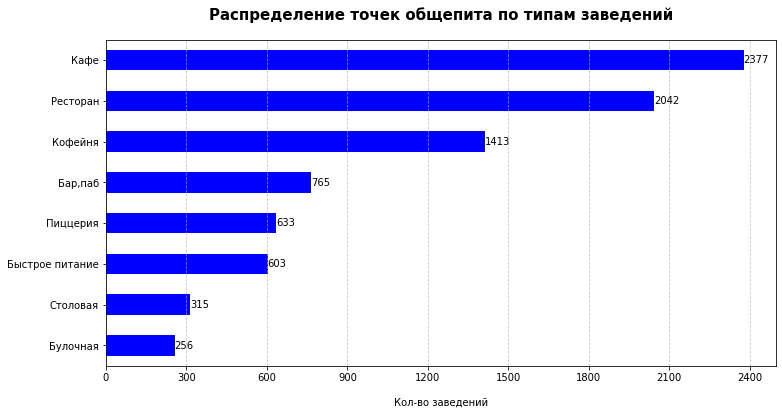

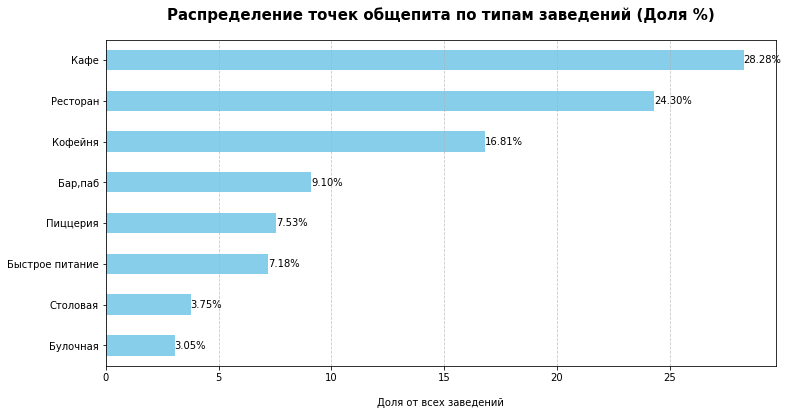

In [39]:
# Создаем график
plt_g = plot_barh(category_info, 'category', 'count', 300, 'Распределение точек общепита по типам заведений', 'Кол-во заведений')
plt_s = plot_barh_with_shares(category_info, 'category','share %', 10, 'Распределение точек общепита по типам заведений (Доля %)', 'Доля от всех заведений')
plt_g.show()
plt_s.show()

**Выводы распределения точек общепита по типам заведений:**
* В датафрейме `8 404` заведения;
* Большая часть этих заведений принадлежит трем типам.:
    * **Кафе** - `2 377` шт., доля от всех `28.3%`;
    * **Ресторан** - `2 042` шт., доля от всех заведений `24.3%`;
    * **Кофейня** - `1 413` шт., доля от всех заведений `16.8%`.
* Меньше всего в Москве булочных - `256` штук и столовых - `315` штук. 

---

### Задача 2


#### Распределение кол-ва заведений по административынм районам Москвы

In [40]:
# Группируем данные по районам и считаем кол-во точек общепита
district_info = rest_df.groupby('district')['id'].count().sort_values(ascending=False).reset_index()

In [41]:
# Создадим маску для удобного и короткого отображения районов
district_mask = {
    'центральный административный округ': 'ЦАО',
    'северный административный округ': 'САО',
    'южный административный округ': 'ЮАО',
    'северо-восточный административный округ': 'СВАО',
    'западный административный округ': 'ЗАО',
    'восточный административный округ': 'ВАО',
    'юго-восточный административный округ': 'ЮВАО',
    'юго-западный административный округ': 'ЮЗАО',
    'северо-западный административный округ': 'СЗАО'
}
district_info['district'] = district_info['district'].map(district_mask)

In [42]:
# Выводим числовое представление
district_info = district_info.rename(columns={'id': 'count'})
district_info['share %'] = round(district_info['count']/district_info['count'].sum() *100,2)
district_info

,district,count,share %
0,ЦАО,2242,26.68
1,САО,898,10.69
2,ЮАО,892,10.61
3,СВАО,891,10.60
4,ЗАО,851,10.13
5,ВАО,798,9.50
6,ЮВАО,714,8.50
7,ЮЗАО,709,8.44
8,СЗАО,409,4.87


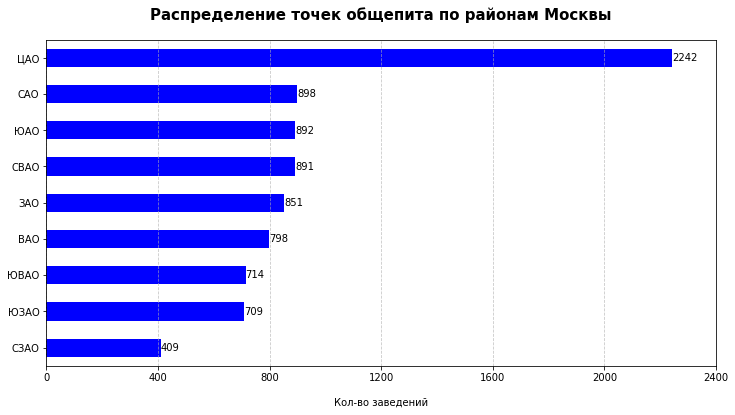

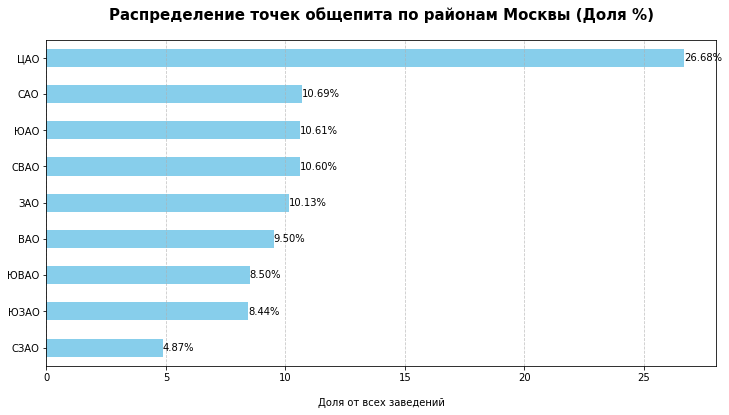

In [43]:
# Создаем график
plt_g = plot_barh(district_info, 'district', 'count', 400, 'Распределение точек общепита по районам Москвы', 'Кол-во заведений')
plt_s = plot_barh_with_shares(district_info, 'district','share %', 10, 'Распределение точек общепита по районам Москвы (Доля %)', 'Доля от всех заведений')
plt_g.show()
plt_s.show()

Для удобного отображения названия районов были сокращены. Расшифровка сокращений:
* `ЦАО` - Центральный административный округ;
* `САО` - Северный административный округ;
* `ЮАО` - Южный административный округ;
* `СВАО` - Северо-Восточный административный округ;
* `ЗАО` - Западный административный округ;
* `ВАО` - Восточный административный округ;
* `ЮВАО`- Юго-Восточный административный округ;
* `ЮЗАО`- Юго-Западный административный округ;
* `СЗАО` - Северо-Западный административный округ.

**Анализ точек общепита по районам:**
* Больше всего заведений в `ЦАО` - `2 242` шт. - `26.7%` от всех точек в Москве;
* Меньше всего в `СЗАО` - `409` шт.;
* В остальных районах распределение примерно одинаковое (от 700 до 900 заведений на район).

#### Распределение кол-ва точек общепита по типам заведений в ЦАО

In [44]:
# Группируем данные по категориям и считаем кол-во точек общепита в ЦАО
category_tsao_info = rest_df[rest_df['district'] == 'центральный административный округ'].groupby('category')['id'].count().sort_values(ascending=False).reset_index()

In [45]:
# Выводим числовое представление
category_tsao_info['category'] = category_tsao_info['category'].str.capitalize()
category_tsao_info = category_tsao_info.rename(columns={'id': 'count'})
category_tsao_info['share %'] = round(category_tsao_info['count']/category_tsao_info['count'].sum() *100,2)
category_tsao_info

,category,count,share %
0,Ресторан,670,29.88
1,Кафе,464,20.70
2,Кофейня,428,19.09
3,"Бар,паб",364,16.24
4,Пиццерия,113,5.04
5,Быстрое питание,87,3.88
6,Столовая,66,2.94
7,Булочная,50,2.23


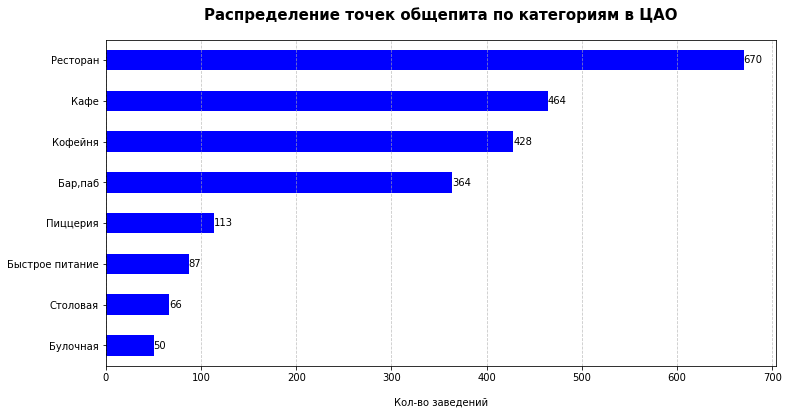

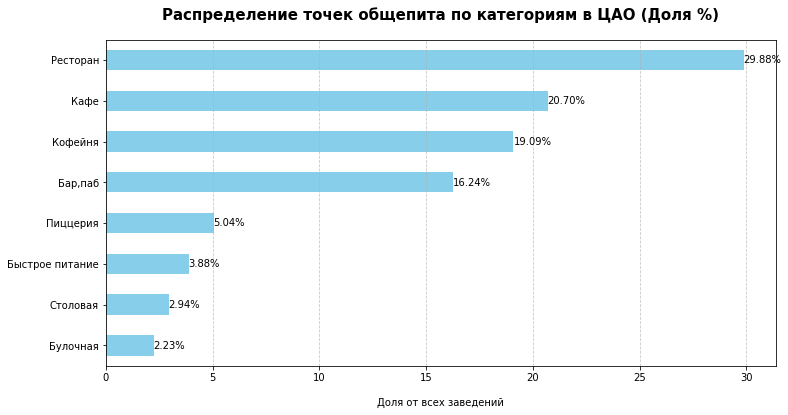

In [46]:
# Создаем график
plt_g = plot_barh(category_tsao_info, 'category', 'count', 100, 'Распределение точек общепита по категориям в ЦАО', 'Кол-во заведений')
plt_s = plot_barh_with_shares(category_tsao_info, 'category','share %', 10, 'Распределение точек общепита по категориям в ЦАО (Доля %)', 'Доля от всех заведений')
plt_g.show()
plt_s.show()

**Выводы распределения точек общепита по типам заведений в ЦАО:**
* В Центральном административном округе `2 242` заведения;
* Большая часть этих заведений принадлежит трем типам.:
    * **Ресторан** - `670` шт., доля от всех `30%`;
    * **Кафе** - `464` шт., доля от всех заведений `20.7%`;
    * **Кофейня** - `428` шт., доля от всех заведений `19%`.
* Меньше всего булочных - `50` штук и столовых - `66` штук. 

---

### Задача 3

Анализ соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [47]:
chain_df = rest_df.groupby('chain')['id'].count().reset_index()

In [48]:
# В данных было указанно (для маленьких ресторанов chain может быть некорректным), проведем проверку
new_df = rest_df[rest_df['chain'] == 0].groupby('name')['id'].count().reset_index()
new_df[new_df['id'] > 1]['name'].count()

65

Как мы можем заметить 65 названий имеют более одной точки общепита. Точно убедится без дополнительных данных о сети невозможно. Т.к. процент мал, то оставим их без изменений.

In [49]:
# Переименуем для для удобного понимания колонки
chain_df['chain'] = chain_df['chain'].map({0: 'Без сети', 1: 'Сетевая точка'})

In [50]:
# Выведем абсолютные и относительные значения
chain_df = chain_df.rename(columns={'id': 'count'})
chain_df['share %'] = round(chain_df['count']/chain_df['count'].sum() *100,2)
chain_df

,chain,count,share %
0,Без сети,5200,61.88
1,Сетевая точка,3204,38.12


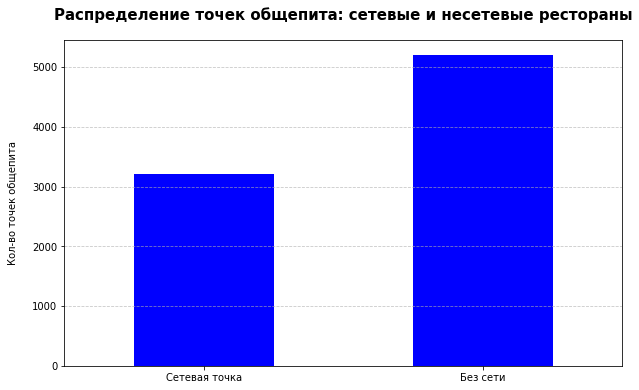

In [51]:
# Нарисуем диаграмму расределения точек общепита
chain_df.sort_values('count').plot.bar(
        x = 'chain',
        y = 'count',
        legend=False, 
        color='blue',    
        figsize=(10, 6),
        rot=360
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Размещаем лейблы и заголовок и оформляем визуал
plt.ylabel('Кол-во точек общепита', labelpad=15)
plt.title('Распределение точек общепита: сетевые и несетевые рестораны', 
            fontsize=15, 
            pad=20, 
            fontweight='bold')
plt.xlabel('')

plt.show()

In [52]:
chain_category_df = rest_df.groupby('category')['chain'].value_counts().unstack(fill_value=0).reset_index()

In [53]:
def share_inf(row):
    return round(row['Сетевая точка']/(row['Сетевая точка'] + row['Без сети']) *100,2)

In [54]:
# Выведем абсолютные и относительные значения
chain_category_df = chain_category_df.rename(columns={0: 'Без сети', 1: 'Сетевая точка'})
chain_category_df['chain_share'] = chain_category_df.apply(share_inf, axis=1)
chain_category_df = chain_category_df.sort_values('chain_share', ascending=False)
chain_category_df

chain,category,Без сети,Сетевая точка,chain_share
1,булочная,99,157,61.33
5,пиццерия,303,330,52.13
4,кофейня,693,720,50.96
2,быстрое питание,371,232,38.47
6,ресторан,1313,729,35.70
3,кафе,1598,779,32.77
7,столовая,227,88,27.94
0,"бар,паб",596,169,22.09


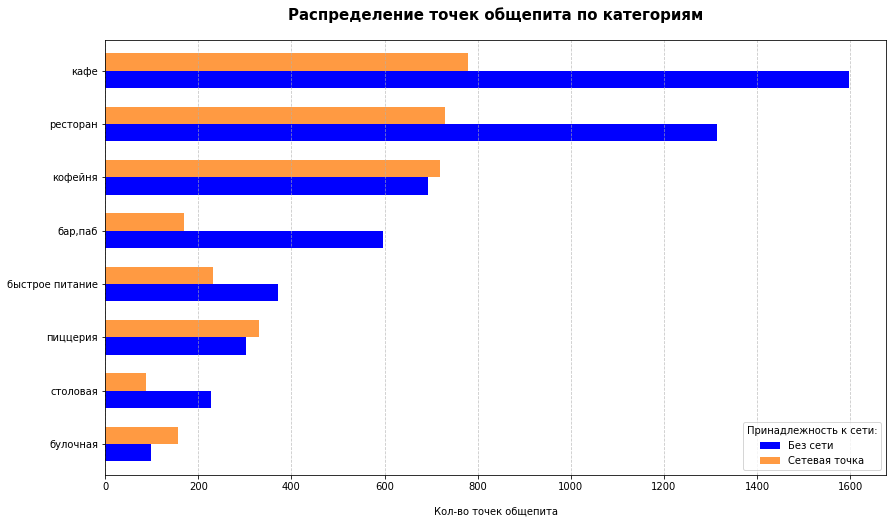

In [55]:
# Создаем график
chain_category_df.sort_values('Без сети').plot(
        kind='barh',
        x='category',
        y=['Без сети', 'Сетевая точка'],
        color=['blue', '#ff9a42'],
        width=0.65,
        figsize=(14, 8)
    )

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Размещаем лейблы и заголовок и оформляем визуал
plt.ylabel('')
plt.title('Распределение точек общепита по категориям', 
            fontsize=15,  
            fontweight='bold',
             pad=20)
plt.legend(title='Принадлежность к сети:', loc='lower right')

plt.xlabel('Кол-во точек общепита', labelpad=15)
plt.show()

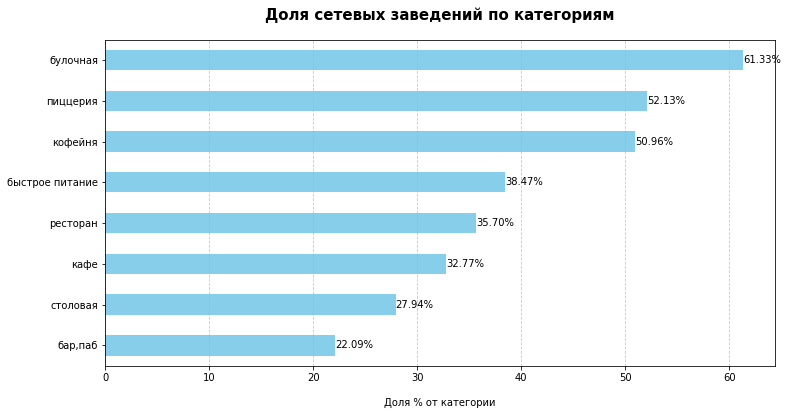

In [56]:
plt_s = plot_barh_with_shares(chain_category_df, 'category','chain_share', 10, 'Доля сетевых заведений по категориям', 'Доля % от категории')
plt_s.show()

In [57]:
chain_category_cao_df = rest_df[rest_df['district']=='центральный административный округ'].groupby('category')['chain'].value_counts().unstack(fill_value=0).reset_index()
chain_category_cao_df = chain_category_cao_df.rename(columns={0: 'Без сети', 1: 'Сетевая точка'})
chain_category_cao_df['chain_share'] = chain_category_cao_df.apply(share_inf, axis=1)
chain_category_cao_df = chain_category_cao_df.sort_values('chain_share', ascending=False)
chain_category_cao_df

chain,category,Без сети,Сетевая точка,chain_share
1,булочная,11,39,78.00
4,кофейня,207,221,51.64
3,кафе,246,218,46.98
5,пиццерия,65,48,42.48
2,быстрое питание,53,34,39.08
7,столовая,41,25,37.88
6,ресторан,453,217,32.39
0,"бар,паб",291,73,20.05


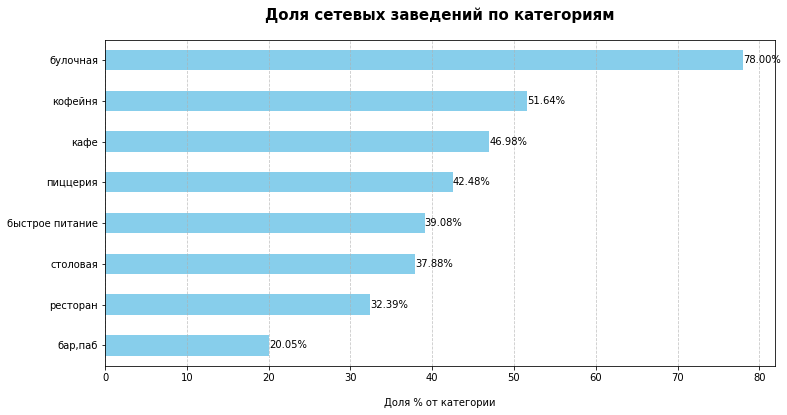

In [58]:
plt_s = plot_barh_with_shares(chain_category_cao_df, 'category','chain_share', 10, 'Доля сетевых заведений по категориям', 'Доля % от категории')
plt_s.show()

**Выводы распределения точек общепита по типам заведений (Сетевые и без сети):**
* Большая часть заведений не являются сетевыми `5 200` шт. - `61.9%` от всех точек;
* По категориям больше всего сетевых заведений в абсолютном количестве у `Кафе`, `Ресторанов` и `Кофеен`;
* В относительном значении доля сетевых заведений от категории выше у булочных `61.3%`, пиццерий `52%` и кофеен `51%`;
* В ЦАО 60% всех точек не являются сетевыми;
* В ЦАО 47% от всех кафе являются сетевыми.

---

### Задача 4

Исследовать количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Привести для каждой категории заведений наиболее типичное для него количество посадочных мест.


In [59]:
# Изучаем статистические показатели столбца seats
rest_df['seats'].describe()

count    4794.000000
mean      108.405090
std       122.840836
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

В колонке `seats` среднее значение 108.4 и медиана 75 сильно отличаются, и присутствует высокое стандартное отклонение 122.8, это может говорить о выбросах. Высокое максимальное значение 1288 посадочных мест подтверждает эту гипотезу.

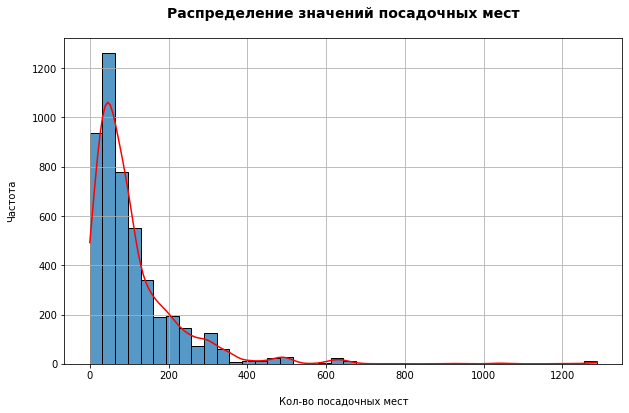

In [60]:
plt.figure(figsize=(10, 6))
# Строим гистограмму распределения
hist = sns.histplot(
    rest_df['seats'],
    bins=40,
    kde=True,
    alpha=0.75,
    edgecolor='black')


plt.ylabel('Частота', labelpad=15)
plt.title('Распределение значений посадочных мест', 
        fontsize=14,  
        fontweight='bold',
        pad=20)
hist.lines[0].set_color('red')
plt.xlabel('Кол-во посадочных мест', labelpad=15)
plt.grid() 

plt.show()

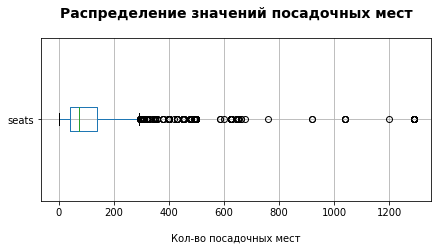

In [61]:
# Ящик с усами
plt.figure(figsize=(7, 3))

rest_df.boxplot(column='seats', vert=False)

plt.title('Распределение значений посадочных мест', 
        fontsize=14,  
        fontweight='bold',
        pad=20)
plt.xlabel('Кол-во посадочных мест', labelpad=15)

# Выводим график
plt.show()

* Основная часть посадочных мест находится в диапазоне от 0 до 200;
* В данных присутствует множество выбросов, которые негативно могут отразиться в рассчетах;
* Выбросы по кол-ву посадочных мест начинаются с значения 300. Для ресторанов, такое кол-во посадочных мест является очень большим;
* Выбросы вызваны общим кол-вом посадочных мест для фудкортов и фудмоллов и ресторанов с большим кол-вом посадочных мест.
* Для корректной статистики оставим кол-во посадочных мест менее 250

In [62]:
# Выборочный анализ для гипотезы (На фудмоллах указано общее кол-во столов)
rest_df[rest_df['address'].str.contains('лесная улица, 20, стр. 3')][['name','address','seats']].head(5)

,name,address,seats
1752,soul in the bowl,"москва, лесная улица, 20, стр. 3",500.0
1792,бансонс бургер китчен,"москва, лесная улица, 20, стр. 3",500.0
1841,k-town korean bbq,"москва, лесная улица, 20, стр. 3",500.0
1870,кофемания,"москва, лесная улица, 20, стр. 3",500.0
1879,bổ,"москва, лесная улица, 20, стр. 3",500.0


В ходе анализа популярного фудмолла «Депо» в Москве было обнаружено, что для каждого ресторана указано общее количество посадочных мест во всем фудмолле. Для корректного расчета посадочных мест необходимо исключить данные о фудмоллах и фудкортах.

In [63]:
seats_df = rest_df[rest_df['seats']<250].groupby('category')['seats'].median().reset_index()
seats_df

,category,seats
0,"бар,паб",70.0
1,булочная,48.0
2,быстрое питание,55.0
3,кафе,50.0
4,кофейня,64.0
5,пиццерия,50.0
6,ресторан,79.0
7,столовая,60.0


Очень странное значение для кофеен - 64 посадочных места. Проведем вторую группировку, исключив фудмоллы и фудкорты.

In [64]:
# Группируем данные по адрессу и местам и считаем кол-во таких заведений
# Считаем, что если у одного адресса одинаковые кол-ва посадочных мест более 3х раз, то данные посадочные места для всех
mask = rest_df.groupby(['address', 'seats'])['name'].transform('count') < 3

rest_df[mask].groupby('category')['seats'].median()

category
бар,паб            75.0
булочная           45.0
быстрое питание    46.5
кафе               50.0
кофейня            64.0
пиццерия           46.0
ресторан           80.0
столовая           75.0
Name: seats, dtype: float32

Данные примерно похожи и имеют небольшие различия. На них можно строить анализ

In [65]:
mode_values = rest_df[rest_df['seats'].between(1,250)].groupby('category')['seats'].apply(lambda x: x.mode().min()).reset_index()

In [66]:
seats_df['seats'] = pd.to_numeric(seats_df['seats'], downcast='integer')

In [67]:
mode_values['seats'] = pd.to_numeric(mode_values['seats'], downcast='integer')

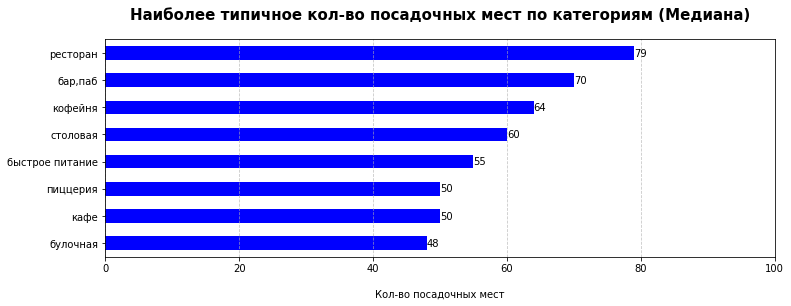

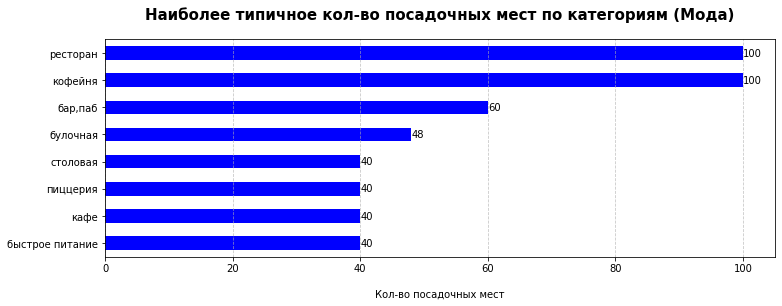

In [68]:
# Создаем график
plt_med = plot_barh(seats_df, 'category', 'seats', 20, 'Наиболее типичное кол-во посадочных мест по категориям (Медиана)', 'Кол-во посадочных мест', (12,4))
plt_mod = plot_barh(mode_values, 'category', 'seats', 20, 'Наиболее типичное кол-во посадочных мест по категориям (Мода)', 'Кол-во посадочных мест', (12,4))
plt_med.show()
plt_mod.show()

In [69]:
seats_df.merge(mode_values, on='category', suffixes=('_med', '_mode'))

,category,seats_med,seats_mode
0,"бар,паб",70,60
1,булочная,48,48
2,быстрое питание,55,40
3,кафе,50,40
4,кофейня,64,100
5,пиццерия,50,40
6,ресторан,79,100
7,столовая,60,40


**Выводы распределения посадочных мест по категориям заведений:**
* В данных присутствуют выбросы, которые связаны с общим кол-вом столов для фудкортов и фудмоллов и огромными ресторанами;
* Для расчетов выбросы были очищены;
* Медиана посадочных мест для всех категорий находится в диапазоне от `50` до `79`;
* Больше всего посадочных мест в категории `Рестораны` - Медиана `79` и мода `100`;
* Меньше всего медианное значение посадочных мест в булочных - `48`;
* Чаще всего в заведения типа `Быстрое питание`, `кафе`, `пиццерия` и `столовая` по `40` посадочных мест
* Чаще всего в `Кофейнях` и `ресторанах` по `100` посадочных мест.

---

### Задача 5

Исследовать рейтинг заведений. Визуализировать распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [70]:
# Изучаем статистические показатели столбца rating
rest_df['rating'].describe()

count    8404.000000
mean        4.230021
std         0.470270
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

В колонке `rating` предположительно стандартное распределение. Среднее значение и медиана примерно равны 4.23 и 4.3. Стандартное отклонение довольно высокое 0.47.

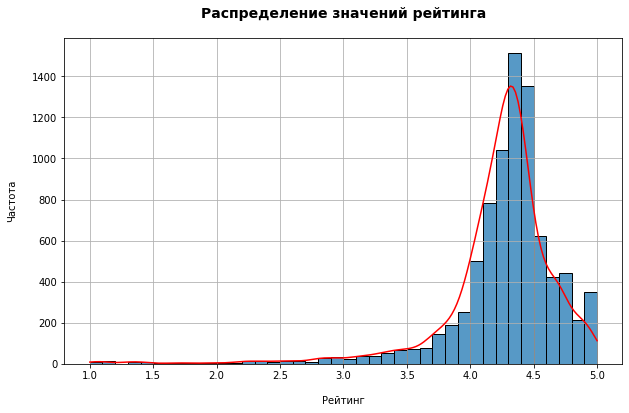

In [71]:
plt.figure(figsize=(10, 6))
# Строим гистограмму распределения
hist = sns.histplot(
    rest_df['rating'],
    bins=40,
    kde=True,
    alpha=0.75,
    edgecolor='black')


plt.ylabel('Частота', labelpad=15)
plt.title('Распределение значений рейтинга', 
        fontsize=14,  
        fontweight='bold',
        pad=20)
hist.lines[0].set_color('red')
plt.xlabel('Рейтинг', labelpad=15)
plt.grid() 

plt.show()

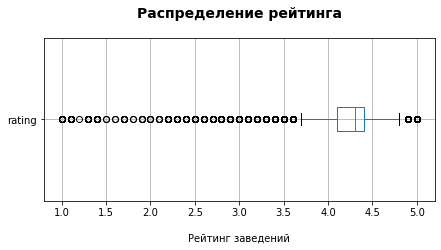

In [72]:
# Ящик с усами
plt.figure(figsize=(7, 3))

rest_df.boxplot(column='rating', vert=False)

plt.title('Распределение рейтинга', 
        fontsize=14,  
        fontweight='bold',
        pad=20)
plt.xlabel('Рейтинг заведений', labelpad=15)

# Выводим график
plt.show()

* Распределение рейтинга нормализованное с левым хвостом;
* Основная часть находится в диапазоне 3.6-4.7;
* Низкий и высокий рейтинг не является выбросами. Значения в пределах допустимого.

In [73]:
rating_group = rest_df.groupby('rating_group')['id'].count().reset_index()

In [74]:
# Выведем абсолютные и относительные значения
rating_group = rating_group.rename(columns={'id': 'count'})
rating_group['share %'] = round(rating_group['count']/rating_group['count'].sum() *100,2)
rating_group

,rating_group,count,share %
0,Низкий рейтинг,98,1.17
1,Средний рейтинг,818,9.73
2,Высокий рейтинг,7488,89.10


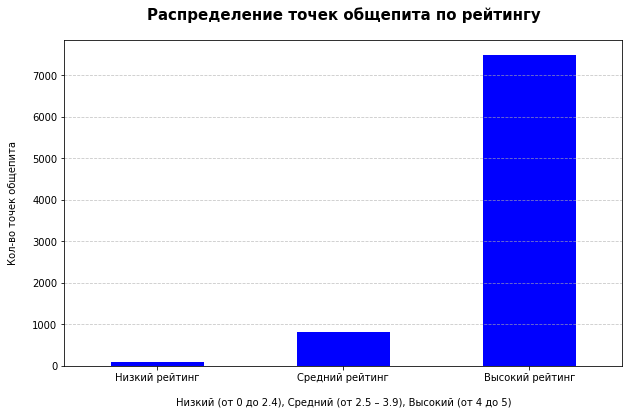

In [75]:
# Деление по типу рейтинга
rating_group.sort_values('count').plot.bar(
        x = 'rating_group',
        y = 'count',
        legend=False, 
        color='blue',    
        figsize=(10, 6),
        rot=360
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Размещаем лейблы и заголовок и оформляем визуал
plt.ylabel('Кол-во точек общепита', labelpad=15)
plt.title('Распределение точек общепита по рейтингу', 
            fontsize=15, 
            pad=20, 
            fontweight='bold')
plt.xlabel('''Низкий (от 0 до 2.4), Средний (от 2.5 – 3.9), Высокий (от 4 до 5)''', labelpad=15)

plt.show()

In [76]:
rating_cat_df = rest_df.groupby('category')['rating'].mean().reset_index()
rating_cat_df = rating_cat_df.rename(columns={'rating': 'avg_rating'})
rating_cat_df.sort_values('avg_rating', ascending=False)

,category,avg_rating
0,"бар,паб",4.387712
5,пиццерия,4.301264
6,ресторан,4.290401
4,кофейня,4.277282
1,булочная,4.268359
7,столовая,4.211429
3,кафе,4.124274
2,быстрое питание,4.050249


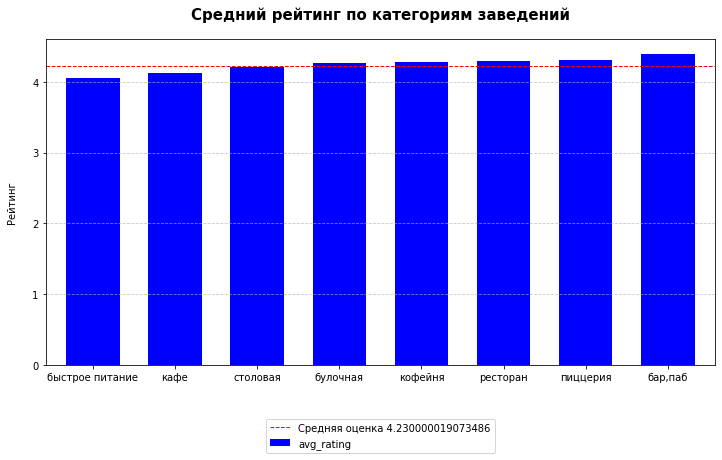

In [77]:
# Создаем график

rating_cat_df.sort_values('avg_rating').plot(
    x='category',
    kind='bar',
    color='blue',
    width=0.65,
    rot=0,
    figsize=(12, 6)
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_rating = round(rest_df['rating'].mean(), 2)

# Наносим на график линию с средним значением
plt.axhline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средняя оценка {round(mean_rating, 2)}')

# Оформляем график
plt.ylabel('Рейтинг', labelpad=15)
plt.title('Средний рейтинг по категориям заведений', 
          fontsize=15,  
          fontweight='bold',
          pad=20)
plt.xlabel('')

# Переносим легенду под график
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.15)) 

plt.show()

**Выводы распределения рейтинга по категориям заведений:**
* 89% всех заведений с высоким рейтингом (от 4 до 5);
* Средняя оценка всех заведений `4.23`;
* Практически все заведения находятся выше среднего значения рейтинга, кроме кафе `4.12` и быстрого питания `4.0`;
* Самый высокий средний рейтинг у Баров `4.38`.

---

### Задача 6

Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построить матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберать самую сильную связь и проверить её.

interval columns not set, guessing: ['rating', 'chain', 'seats']


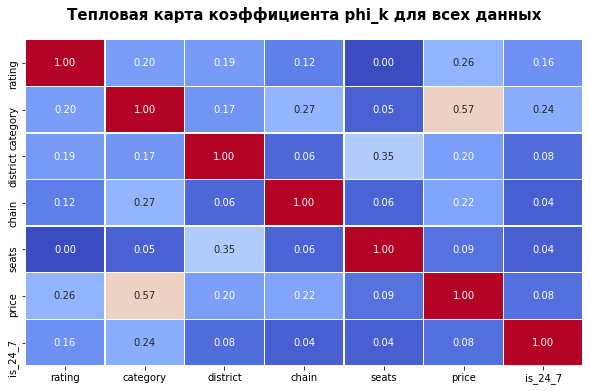

In [78]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = rest_df[['rating','category', 'district', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False 
           )


plt.title('Тепловая карта коэффициента phi_k для всех данных',
         fontsize=15,  
          fontweight='bold',
          pad=20)

# Выводим график
plt.show()

In [79]:
matrix_rait = correlation_matrix.loc[correlation_matrix.index != 'rating']['rating'].sort_values(ascending=False)
matrix_rait

price       0.262056
category    0.198829
district    0.189431
is_24_7     0.160994
chain       0.118621
seats       0.000000
Name: rating, dtype: float64

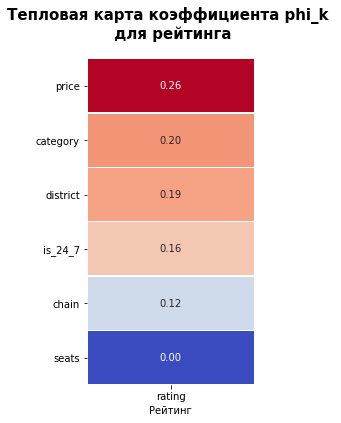

In [80]:
# Создаем heatmap
plt.figure(figsize=(3, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values('rating',ascending=False)

sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для рейтинга', fontsize=15,  
          fontweight='bold',
          pad=20)
plt.xlabel('Рейтинг')
plt.yticks(rotation=0)

# Выводим график
plt.show()

* Наблюдается корреляция рейтинга с ценовой категорией 0.26, необходимо проверить детальнее
* В общей корелляционной матрице наблюдается корреляция цены с категорией

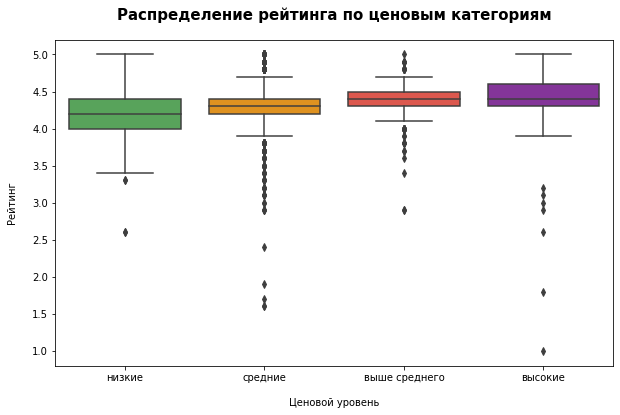

In [81]:
# Проверим распределение рейтинга от уровня цен
plt.figure(figsize=(10, 6))

colors = ['#4CAF50', '#FF9800', '#F44336', '#8E24AA']

sns.boxplot(x='price', y='rating', data=rest_df, order=['низкие', 'средние', 'выше среднего', 'высокие'], palette=colors)


plt.title('Распределение рейтинга по ценовым категориям', fontsize=15,  
          fontweight='bold',
          pad=20)
plt.xlabel('Ценовой уровень', labelpad=15)
plt.ylabel('Рейтинг', labelpad=15)
plt.show()

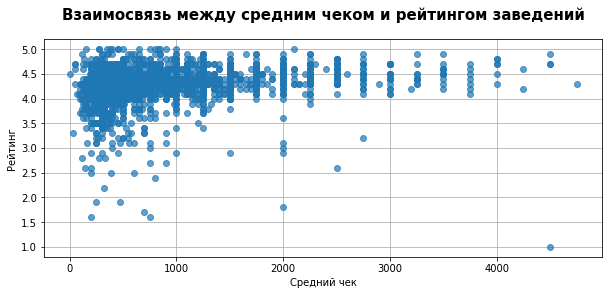

In [82]:
# Проверим связь среднего чека с рейтингом заведения
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(
    rest_df[rest_df['middle_avg_bill']<5000]['middle_avg_bill'],
    rest_df[rest_df['middle_avg_bill']<5000]['rating'],
    marker='o',
    linestyle='',
    alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между средним чеком и рейтингом заведений', fontsize=15, fontweight='bold',
          pad=20)
plt.xlabel('Средний чек')
plt.ylabel('Рейтинг')
plt.grid()


# Отображаем график
plt.show()

**Выводы корреляции рейтинга с другими значениями:**
* Ценовой уровень имеет положительную корреляцию с рейтингом заведения;
* Чем выше ценовой уровень, тем выше становятся оценки и меньше разброс в оценках;
* Наибольший разброс рейтинга наблюдается в категории `низкие`;
* Категория `высокие цены` имеет наиболее высокие оценки;
* Между средним чеком и рейтингом не наблюдается взаимосвязей

Можем предположить, что в заведениях с высокими ценами интереснее меню, лучше качество продуктов и сервис. Соответственно, эта корреляция подтверждает данную гипотезу.

---

### Задача 7

Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве. Для них посчитать значения среднего рейтинга.

In [83]:
chains_df = rest_df.query('chain == 1').groupby(['name','category']).agg({ 'id': 'count', 'rating': 'mean'}).reset_index()

In [84]:
chains_df = chains_df.sort_values('id', ascending=False).head(15)
chains_df = chains_df.rename(columns={'id': 'doors','rating': 'avg_rating'})
chains_df

,name,category,doors,avg_rating
1126,шоколадница,кофейня,119,4.178151
496,домино'с пицца,пиццерия,76,4.169737
489,додо пицца,пиццерия,74,4.286487
205,one price coffee,кофейня,71,4.064789
1142,яндекс лавка,ресторан,69,3.872464
72,cofix,кофейня,65,4.075385
241,prime,ресторан,49,4.114285
617,кофепорт,кофейня,42,4.147619
632,кулинарная лавка братьев караваевых,кафе,39,4.394872
963,теремок,ресторан,36,4.105556


При анализе данных было замечено что в названиях существуют примерно одинаковые по смыслу значения. Например 'Яндекс лавка' и 'Яндекс.Лавка'. К сожалению данных - является ли это разными названиями или технической ошибкой у нас нет, поэтому было приянто решение оставить датафрейм исходным

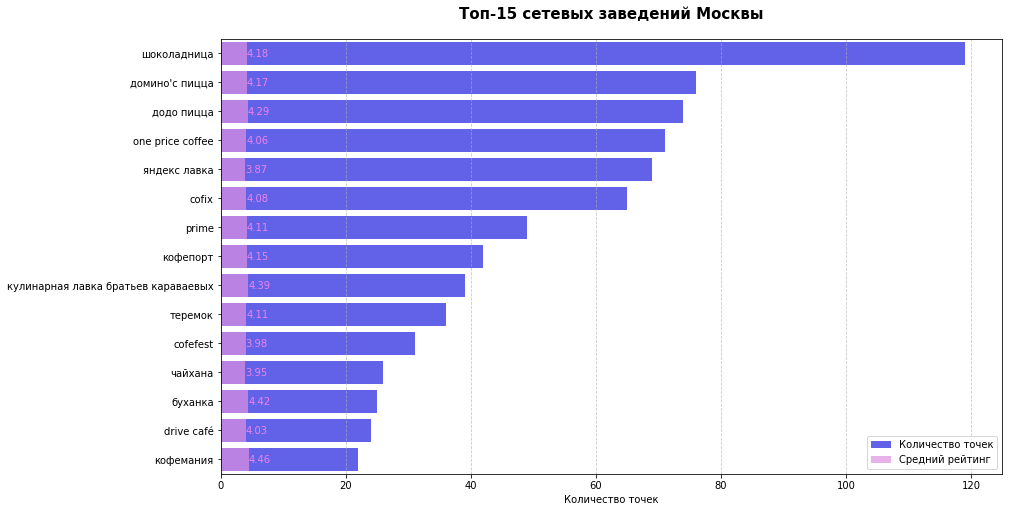

In [85]:
plt.figure(figsize=(14, 8))

sns.barplot(x='doors', y='name', data=chains_df, color='blue', alpha=0.7, label='Количество точек')
sns.barplot(x='avg_rating', y='name', data=chains_df, color='violet', alpha=0.7, label='Средний рейтинг')

for i, txt in enumerate(chains_df['avg_rating']):
    plt.annotate(f'{txt:.2f}', 
                 (txt, i), 
                 textcoords="data", 
                 color='violet', 
                 ha='left', 
                 va='center', 
                 fontsize=10)
    
plt.legend(loc='lower right')  

plt.title('Топ-15 сетевых заведений Москвы', fontsize=15, fontweight='bold',
          pad=20)
plt.xlabel('Количество точек')
plt.ylabel('')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

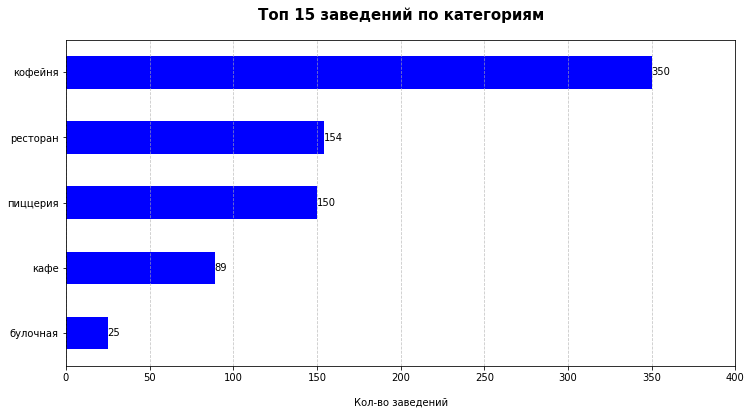

In [86]:
# Создаем график
chains_df = chains_df.groupby('category').agg({'doors': 'sum'}).reset_index()
plt_g = plot_barh(chains_df, 'category', 'doors', 50, 'Топ 15 заведений по категориям', 'Кол-во заведений')
plt_g.show()

**Выводы:**
* В топ 15 сетевых заведений по кол-ву в основном входят кофейни, рестораны и пиццерии;
* Топ-1 - `Шоколадница` с 119 заведениями в Москве;
* Топ-2 и Топ-3 занимают пиццерии `Доминос` и `ДоДо`;
* Средний ретинг находится в пределах от 3.9 `Яндекс лавка` до 4.5 `Кофемания`;
* Больше всего точек в топ-15 в категории сетевых кофеен - 350 шт.

---

### Задача 8

Изучить вариацию среднего чека заведения в зависимости от района Москвы. Проанализировать цены в Центральном административном округе и других.


In [87]:
bill_info = rest_df.dropna(subset=['middle_avg_bill']).copy()
bill_info['district'] = bill_info['district'].map(district_mask)

# В данных есть выбросы одиночные рестораны с чеком 10 000, 35 000. Убререм их
bill_info = bill_info[bill_info['middle_avg_bill'].between(1,9900)]

In [88]:
bill_info.groupby('district').agg(count=('id', 'count'),
    min_bill=('middle_avg_bill', 'min'),
    max_bill=('middle_avg_bill', 'max'),
    median_bill=('middle_avg_bill', 'median')).reset_index()

,district,count,min_bill,max_bill,median_bill
0,ВАО,259,50.0,5500.0,550.0
1,ЗАО,306,50.0,5250.0,1000.0
2,САО,321,130.0,5000.0,650.0
3,СВАО,301,50.0,4500.0,500.0
4,СЗАО,157,120.0,2900.0,700.0
5,ЦАО,1059,67.0,7250.0,1000.0
6,ЮАО,313,100.0,3500.0,500.0
7,ЮВАО,194,30.0,3750.0,450.0
8,ЮЗАО,235,100.0,2750.0,600.0


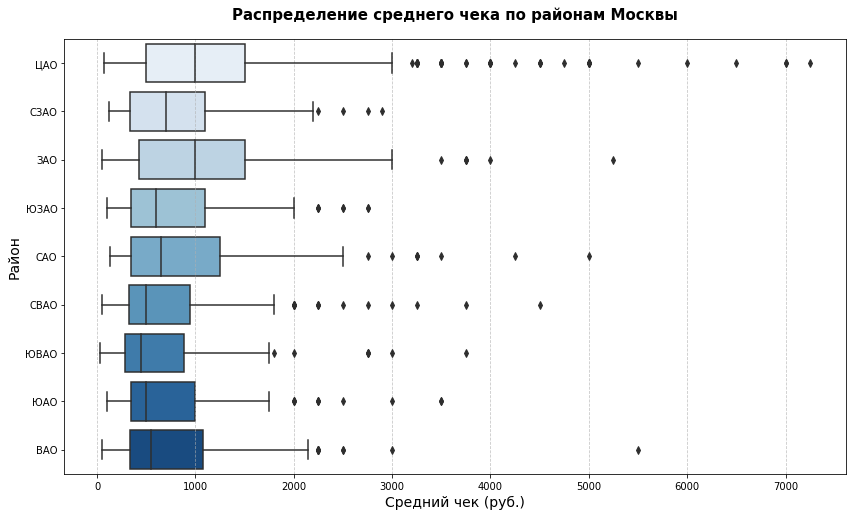

In [89]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='middle_avg_bill', 
            y='district', 
            data=bill_info, 
            palette='Blues',
            order=['ЦАО', 'СЗАО', 'ЗАО', 'ЮЗАО', 'САО', 'СВАО', 'ЮВАО', 'ЮАО', 'ВАО'])


plt.title('Распределение среднего чека по районам Москвы', fontsize=15, 
            pad=20, 
            fontweight='bold')
plt.xlabel('Средний чек (руб.)', fontsize=14)
plt.ylabel('Район', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Основные наблюдения:**
* В `ЦАО` средний чек достигает `1000` рублей и максимальный чек - `7250`, что является максимальным значением;
* По мере удаления от центра средний чек уменьшается;
* Наблюдаюся примерно одинаковые значения среднего чека и его распределения для `ЦАО` и `ЗАО`, при учете меньшего кол-ва заведений в ЗАО

---

### Промежуточный вывод


* Больше всего заведений открыто в ЦАО - `2242` штуки, меньше всего в ЮЗАО. В остальных районах распределение примерно одинаковое.
* Большая часть точек общепита находится в категориях Кафе, Ресторан и Кофейня и занимают `69%` от всех заведений. Бары занимают всего `9%`. В ЦАО распределение аналогичное, однако первое место занимают Рестораны `30%` от всех точек общепита в административном округе, бары занимают `16%`.
* В Москве доля сетевых заведений составляет `38%`. Для Кафе и Ресторанов доля сетевых заведений меньше. Более `50%` кофеен в Москве-сетевые. В ЦАО `60%` заведений не пренадлежат сетям.
* Чаще всего в кофейнях и ресторанах по `100` посадочных мест, а в кафе `40` мест. Среднее значение мест для кофеен и ресторанов в районе `60-70`. В барах чаще всего `60` посадочных мест.
* Больше всего заведений в Москве с высоким рейтингом от 4х звезд до 5. Рейтинг заведений зависит от их ценового диапазона. Чем выше цена, тем выше рейтинг у заведений. Рейтинг у баров самый высокий.
* Топ 15 сетевых заведений по категориям - бренды о которых все знают и которые вкладываются в маркетинг (Додо, доминос, Шоколадница). Больше всего сетевых пиццерий, кофеен и ресторанов.
* В ЦАО максимальное значение среднего чека. При сравнении средних чеков по районам наблюдается зависимость - средний чек уменьшается с удалением от центра. Стоит обратить внимание, что среднее значение и статистические показатели для среднего чека практически одинаковы для ЦАО и ЗАО, при учете большего кол-ва точек в ЦАО.

---

## 4. Итоговый вывод и рекомендации

### Общий обзор проделанной работы:
В ходе исследования проанализировали данные 8406 заведений общественного питания в Москве. Данные включали основную информацию о заведениях, местоположение, рейтинги и ценовые диапазоны. Акцент исследования был в анализе различных метрик для выявления ключевой информации о рынке общественного питания Москвы.

### Главные выводы исследования:
**Районы**
* Самый высокий чек и его среднее значение в ЦАО, однако среднее значение чека и его распределение в ЗАО находится на одинаковом уровне. В ЦАО больше всего заведений общественного питания 2242 штуки, в ЗАО кол-во точек на одном уровне с другими районами (примерно 700 шт.);

**Категории общепита**
* Больше всего заведений общепита находятся в категориях Кафе, Ресторан и Кофейня и занимают 69% от всех заведений. В ЦАО распределение аналогичное, однако первое место занимают Рестораны 30% от всех точек общепита в административном округе. Бары в Москве занимают 9%, а в ЦАО 16%;
* Сетевые точки составляют 28% от всех точек общепита в Москве. В ЦАО 60% заведений не являются сетевыми.

**Цены и посадочные места**
* Чаще всего в кофейнях и ресторанах по 100 посадочных мест, а в кафе 40 мест. Среднее значение мест для баров 60.
* Ценовые уровни связаны с рейтингом. Чем выше ценовой уровень, тем выше рейтинг заведения. Это может быть связано с уровнем сервиса, продуктами и меню. Для баров средний рейтинг выше медианы.


### Рекомендации на основе анализа данных:
В качестве рекомендаций стоит обратить внимание на высокие показатели среднего чека для районов ЦАО и ЗАО. В ЦАО больше всего точек общественного питания, возможно, рынок может быть перезаполнен, особенно для кафе, ресторанов и кофеен. Доля баров в ЦАО меньше. При одинаковом показателе чека в ЗАО заведений там намного меньше.

Рейтинг заведения связан с ценовым уровнем. Рекомендую сфокусировать свое внимание на сервисе и заботе о клиенте, при разработке меню можно рассмотреть высокий и средне-высокий ценовой уровень.

Дополнительно можно провести анализ меню конкурентов и их ценовую политику для комплексного анализа.